In [2]:
from utils.utils import cal_hv
import json
import numpy as np


def cal(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    test_result = data['test_result']
    objectives = []
    for value in test_result:
        objectives.append([value["normal_reject"], value["normal_cost"]])
    objectives = np.array(objectives)
    hv = cal_hv(objectives, np.array([1,1]))
    time = data["time_train"]
    return hv, time

def cal_algorithms(data_set):
    name_data = data_set[:-5]
    surrogate_path = "Test_result/Surrogate/" + data_set
    surrogate_hv = cal(surrogate_path)
    print("Surrogate", surrogate_hv)
    NSGAII_path = "Test_result/NSGAII/" + data_set
    NSGAII_hv = cal(NSGAII_path)
    print("NSGAII", NSGAII_hv)

    MOEAD_path = "Test_result/MOEAD/" + data_set
    MOEAD_hv = cal(MOEAD_path)

    SPEA_path = "Test_result/SPEA/" + data_set
    SPEA_hv = cal(SPEA_path)
    # print(name_data, surrogate_hv, NSGAII_hv, MOEAD_hv, SPEA_hv)
    return name_data, surrogate_hv, NSGAII_hv, MOEAD_hv, SPEA_hv



In [3]:
print(cal(r"Test_result\Surrogate\14_03_2024_conus_centers_easy_s3.json"))


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False

(0.40307109255413986, 5921.8371431827545)


In [13]:
print(cal(r"Test_result\NSGAII\16_03_2024_nsf_urban_noob_s3.json"))

(0.3165867506053565, 221.82642674446106)


In [14]:
print(cal(r"Test_result\Surrogate\16_03_2024_nsf_urban_noob_s3.json"))

(0.31311509853369807, 69.15579748153687)


In [15]:
print(cal(r"Test_result\Surrogate\16_remove.json"))

(0.31435419422860994, 52.286229372024536)


In [5]:
def hv_over_generation(path_name, gen_num):
    with open(path_name, 'r') as f:
        data = json.load(f)
    
    hv_gen = []
    for i in range(gen_num):
        objectives = []
        for value in data[str(i + 1)]:
            objectives.append([value["obj1"], value["obj2"]])
        objectives = np.array(objectives)
        hv = cal_hv(objectives, np.array([1,1]))
        hv_gen.append(hv)
    return hv_gen

In [16]:
abc = hv_over_generation(r"Pareto_objective_history\Surrogate\16_03_2024_nsf_urban_noob_s3.json", 10)

In [17]:
xyz = hv_over_generation(r"Pareto_objective_history\NSGAII\16_03_2024_nsf_urban_noob_s3.json", 10)

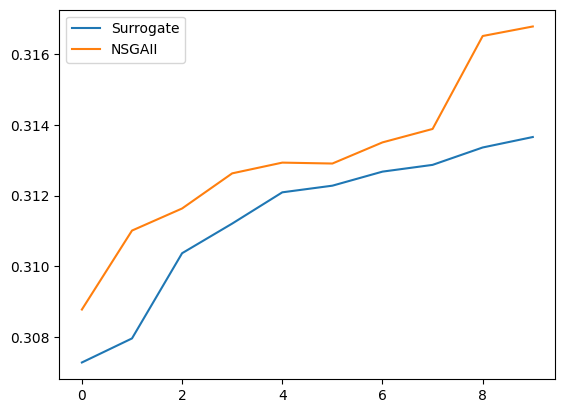

In [18]:
import matplotlib.pyplot as plt
plt.plot(abc, label="Surrogate")
plt.plot(xyz, label="NSGAII")
plt.legend()